<a href="https://colab.research.google.com/github/ausaf-a/ml-song-recommender/blob/gh-pages/ML_Song_Recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction/Background
Music has always been a staple of our lives. It can convey emotions and bring back memories for us all. Having such a prominent effect on our lives, we can see why massive companies like Spotify, Youtube, and Soundcloud implement innovative technologies to compete for the best music streaming service for the consumer. One feature that’s used by all of these companies and more is a recommendation system. A service can continue providing enjoyable content to a user that’s catered to their likings by using such a system, which is something we wanted to explore. This helps us tie in powerful machine learning algorithms with something we love and enjoy on a daily basis.

# Problem definition
The problem is that Spotify is not able to recommend new songs that sound “similar” to the current song being listened to. It seems that spotify suggests songs based on other users listening history rather than inference. Our goal is to provide music recommendations based on how closely the quantifiable features of a song match to others, with the idea that these features contain the information that makes two songs sound similar to the human ear.  

# Data Collection
By reaching out to fellow georgia tech students, we were able to acquire around 6 playlists, totaling to over 250 songs. We utilized spotify’s API in order to extract the unique songs out of these playlists, and then perform feature extraction on these songs. We are able to construct an 11-dimensional feature vector out of the data returned from the api, consisting of the following numeric features: 

danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness	liveness, valence, tempo

# Methods
We take the 11-dimensional feature vectors that compose the dataset, and extract two of the principal components after applying PCA. This projects the data points onto two of the axes that have the largest amount of variance. We then send this reduced data into the K-means algorithm in order to return clusters. We run K means several times with different cluster sizes to try and find the optimal cluster size using the elbow method.  

# Results and Discussion

# Dataset 
Spotify playlists containing 261 songs

In [168]:
playlists = """
https://open.spotify.com/playlist/0Bie8YaaPo7t7pwwihn2EB?si=31f790531b85444c
https://open.spotify.com/playlist/3kHSFQiGtPML3w4AE5OJYv?si=gsOxTQIGQL-zimB4FNbk6A
https://open.spotify.com/playlist/1zXwPKbXqLEbb5kBo2oiK5?si=Fswjd5A-TAyptYq9frJcXg
https://open.spotify.com/playlist/0inOzNw7liwlduc94yqTV0?si=H70V7XtyTru8yUygxM2PVQ
""".strip()

# Pipeline

## Stage 1.1: playlists -> songs -> features -> principal components

- Spotify API to pull song data from playlists 
- Spotify API to pull feature data for each song 

output: 

np.array with shape (NumSongs, FeatureSize)

In [169]:
import itertools
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

api = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials('f2883f3df24c43bc9126b3248f2c7ff2', '7b66ce34cd7346afaef61c3f4a12c226'), )

# playlist urls -> playlist_ids
playlist_ids = [token.split('?si=')[0] for token in [ p.split('/playlist/')[1] for p in playlists.split('\n')]]
# print(playlist_ids)

# playlist_tracks -> track_ids 
playlist_tracks = list(itertools.chain(*[api.playlist_tracks(pid)['items'] for pid in playlist_ids]))
tids = set()

# track_ids -> features 
track_ids = set([track['track']['uri'] for track in playlist_tracks])
print(f'{len(track_ids)} unique track ids')
track_ids = list(track_ids)


def get_api_features(track_ids):
    """
     Spotify API only allows us to retrieve features for songs in batches of 100. 
     To bypass this we break up the tracks into multiple batches of requests and merge them together. 
    """
    features = []
    batchLimit = 100 
    current = 0 
    while current < len(track_ids):
      featureBatch = api.audio_features(track_ids[current:current+batchLimit]) 
      features.extend(featureBatch)
      current += batchLimit

    return features

api_features = get_api_features(track_ids)
df = pd.DataFrame().from_dict(api_features)

# 11 dim feature vector
desired_features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
# df = df[desired_features]
# df = (df-df.mean())/df.std()
df

261 unique track ids


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.698,0.729,2,-3.670,1,0.1010,0.0605,0.000000,0.0918,0.306,140.083,audio_features,2JHHa7MKQahUQi5d4At1GZ,spotify:track:2JHHa7MKQahUQi5d4At1GZ,https://api.spotify.com/v1/tracks/2JHHa7MKQahU...,https://api.spotify.com/v1/audio-analysis/2JHH...,202867,4
1,0.706,0.723,5,-7.920,1,0.3910,0.1150,0.000043,0.2000,0.745,140.164,audio_features,08mHFRDUhiIybq23kKQuxS,spotify:track:08mHFRDUhiIybq23kKQuxS,https://api.spotify.com/v1/tracks/08mHFRDUhiIy...,https://api.spotify.com/v1/audio-analysis/08mH...,61714,4
2,0.750,0.789,2,-4.578,1,0.1080,0.2530,0.000000,0.1290,0.673,147.957,audio_features,7LGWmZaoS7jZJ5tEi9EcDi,spotify:track:7LGWmZaoS7jZJ5tEi9EcDi,https://api.spotify.com/v1/tracks/7LGWmZaoS7jZ...,https://api.spotify.com/v1/audio-analysis/7LGW...,157133,4
3,0.760,0.886,9,-5.356,0,0.0258,0.0219,0.000007,0.6230,0.780,123.002,audio_features,0uVyZywUNOp6S0dU5r8TS8,spotify:track:0uVyZywUNOp6S0dU5r8TS8,https://api.spotify.com/v1/tracks/0uVyZywUNOp6...,https://api.spotify.com/v1/audio-analysis/0uVy...,189399,4
4,0.463,0.566,8,-6.195,1,0.1450,0.1960,0.000000,0.2840,0.219,93.921,audio_features,6z1kLsntE7FuzKZHZWrXYN,spotify:track:6z1kLsntE7FuzKZHZWrXYN,https://api.spotify.com/v1/tracks/6z1kLsntE7Fu...,https://api.spotify.com/v1/audio-analysis/6z1k...,255729,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,0.894,0.161,4,-14.311,1,0.0880,0.7050,0.003300,0.3120,0.824,104.968,audio_features,4kYPnVuU1jFMmGhOstcKDN,spotify:track:4kYPnVuU1jFMmGhOstcKDN,https://api.spotify.com/v1/tracks/4kYPnVuU1jFM...,https://api.spotify.com/v1/audio-analysis/4kYP...,222307,4
257,0.717,0.653,1,-5.634,1,0.0658,0.2290,0.000000,0.1010,0.412,106.966,audio_features,3e9HZxeyfWwjeyPAMmWSSQ,spotify:track:3e9HZxeyfWwjeyPAMmWSSQ,https://api.spotify.com/v1/tracks/3e9HZxeyfWwj...,https://api.spotify.com/v1/audio-analysis/3e9H...,207320,4
258,0.573,0.739,0,-5.740,1,0.1290,0.0285,0.000000,0.1110,0.451,97.085,audio_features,0prNGof3XqfTvNDxHonvdK,spotify:track:0prNGof3XqfTvNDxHonvdK,https://api.spotify.com/v1/tracks/0prNGof3XqfT...,https://api.spotify.com/v1/audio-analysis/0prN...,230227,4
259,0.409,0.594,1,-9.725,1,0.0310,0.0320,0.039100,0.0904,0.212,110.187,audio_features,2d3QlXE6FXFDeodiS66yjM,spotify:track:2d3QlXE6FXFDeodiS66yjM,https://api.spotify.com/v1/tracks/2d3QlXE6FXFD...,https://api.spotify.com/v1/audio-analysis/2d3Q...,209455,4


## Stage 1.2: Raw Dataset -> Normalized DataFrame -> Principal Components

[[-0.67590467 -1.38071474]
 [-0.4653378   1.08616258]
 [-1.14603028 -0.28405203]]


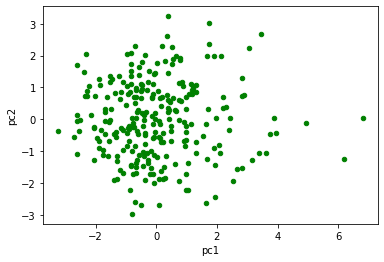

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)
pdf = pd.DataFrame(data=principalComponents, columns=['pc1', 'pc2'])
pdf.plot.scatter(x='pc1',y='pc2', c='Green')

dataset = pdf.to_numpy()
print(dataset[:3])

## Stage 2: Dataset -> K-means -> Classes 


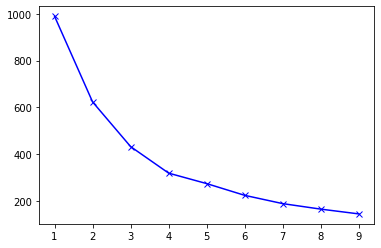

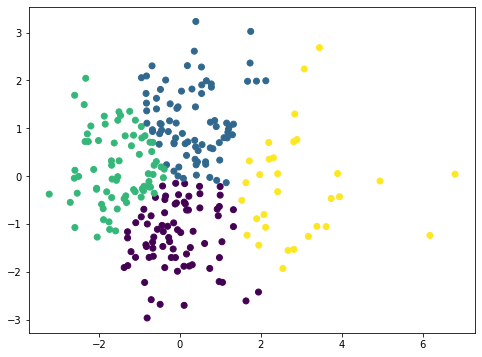

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt 

distortions = []


X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])
X = np.random.rand(100, 2)

I = range(1, 10)
for i in I:
  kmeans = KMeans(n_clusters=i, random_state=0).fit(dataset)
  distortions.append(kmeans.inertia_)

plt.plot(I, distortions, 'bx-')

kmeans.labels_

kmeans.predict([[0, 0], [12, 3]])

kmeans.cluster_centers_

kmeans = KMeans(n_clusters=4, random_state=0).fit(dataset)

plt.figure(figsize=(8, 6))
plt.scatter(dataset[:,0], dataset[:,1], c=kmeans.labels_.astype(float))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: covariance is not positive-semidefinite.
  """


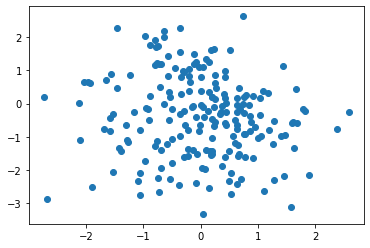

In [ ]:

X = np.stack(
    [
    #  np.random.multivariate_normal(mean=[1,1], cov=[[1,0],[0, 1]], size=100),
     np.random.multivariate_normal(mean=[0,0], cov=np.random.rand(2,2), size=100), 
     np.random.multivariate_normal(mean=[-1,.5], cov=[[1,0],[0, 1]], size=100) 
    ],
    axis=1
    )
plt.scatter([x[0] for x in X], [x[1] for x in X])

## Stage 3: Application Endpoint
- TODO: F(Song, Dataset, Labels) -> Cluster -> Random new song from cluster